In [4]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('lip_expression.csv')

In [3]:
df.head()

,X1,X2
0,0.981321,-0.499666
1,1.844094,0.072311
2,-0.060090,1.048577
3,-0.174089,1.099558
4,-0.464776,0.877356


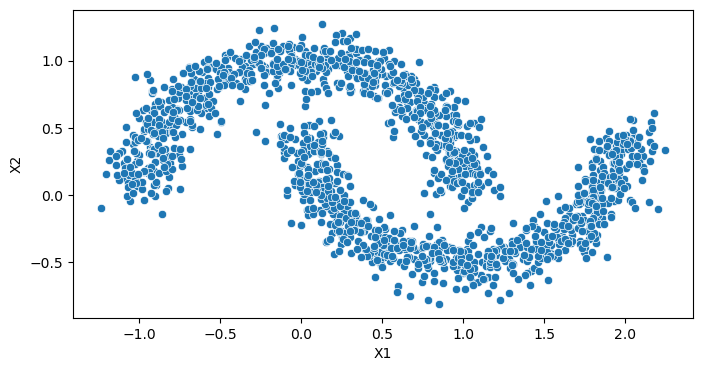

In [8]:
plt.figure(figsize = (8,4))
sns.scatterplot(data=df, x='X1',y ='X2')
plt.show()

### The data are about the points relating to a lip expression of an emoji or emoticon symbolizing a (frown/smile)
* the data when visualized looks partly spherical and nested as well


##### We will try to use KMeans to segment the data

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 2 )
label = model.fit_predict(df)

In [12]:
label

array([1, 1, 0, ..., 0, 1, 1])

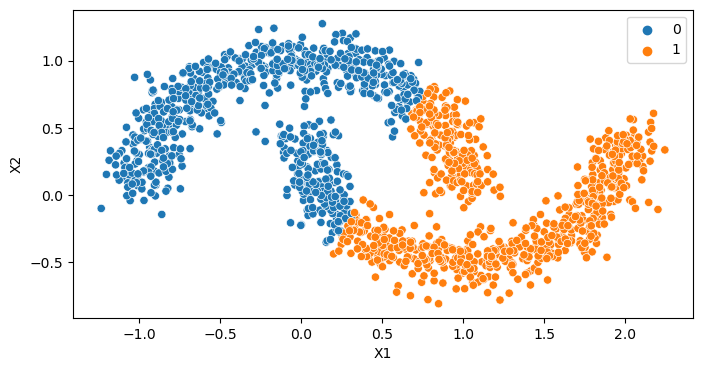

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='X1',y ='X2',hue=label)
plt.show()

In [15]:
res = []
for i in range(2,10):
    clust = KMeans(n_clusters=i, random_state=42)
    clust.fit(df)
    cl_labels =  clust.predict(df)
    res.append(clust.inertia_)
    

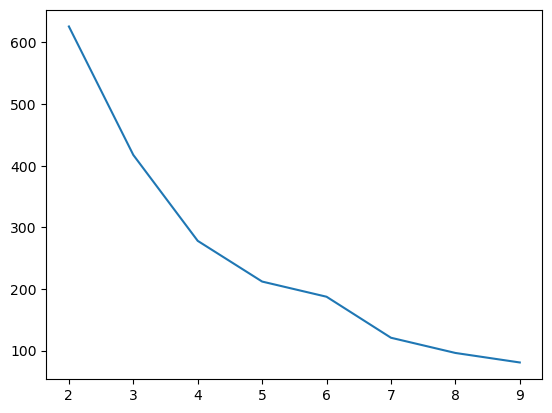

In [16]:
plt.plot(range(2,10), res)
plt.show()

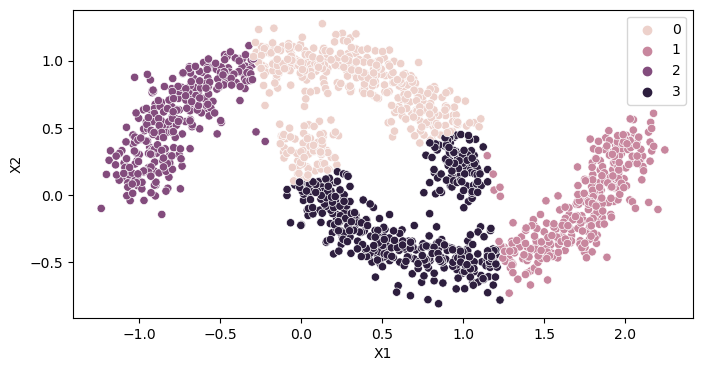

In [17]:
model = KMeans(n_clusters = 4 )
label = model.fit_predict(df)

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='X1',y ='X2',hue=label)
plt.show()

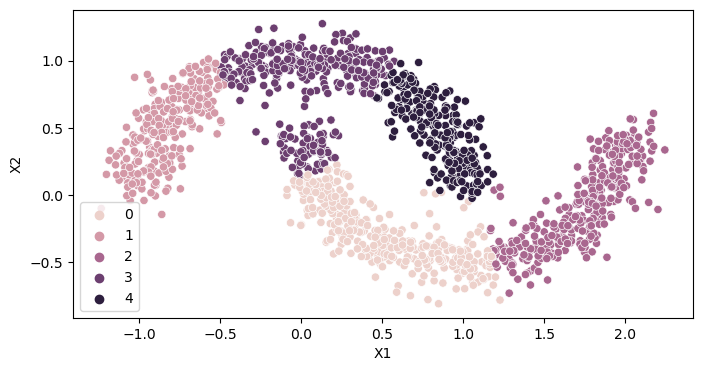

In [18]:
model = KMeans(n_clusters = 5)
label = model.fit_predict(df)

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='X1',y ='X2',hue=label)
plt.show()

###### the resulted segment does not satisfy so we will try DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [23]:
model = DBSCAN()
label = model.fit_predict(df)

In [24]:
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

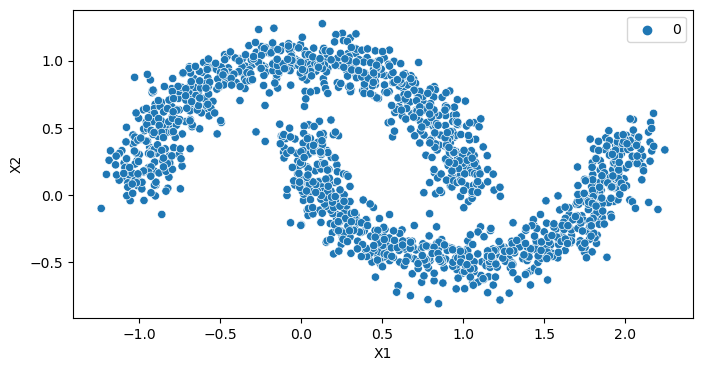

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='X1',y ='X2',hue=label)
plt.show()

* parameters

* minPts - the minimum number of points for a cluster to be identified as dense

* eps (epsilon) - points that are closer than eps will be considered as part of the cluster


* Find the best value for eps parameter

In [26]:
np.linspace(0.001,10,100)

array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+00, 2.829e+00, 2.930e+00,
       3.031e+00, 3.132e+00, 3.233e+00, 3.334e+00, 3.435e+00, 3.536e+00,
       3.637e+00, 3.738e+00, 3.839e+00, 3.940e+00, 4.041e+00, 4.142e+00,
       4.243e+00, 4.344e+00, 4.445e+00, 4.546e+00, 4.647e+00, 4.748e+00,
       4.849e+00, 4.950e+00, 5.051e+00, 5.152e+00, 5.253e+00, 5.354e+00,
       5.455e+00, 5.556e+00, 5.657e+00, 5.758e+00, 5.859e+00, 5.960e+00,
       6.061e+00, 6.162e+00, 6.263e+00, 6.364e+00, 6.465e+00, 6.566e+00,
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 

In [35]:
op = []
pop = []

for eps in np.linspace(0.001,10,100):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(df)
    
    op.append(np.sum(dbscan.labels_ == -1))
    
    ipop = 100 * np.sum(dbscan.labels_ == -1)/ len(dbscan.labels_)
    
    #pop.append(pop)
    #print(pop)
    pop.append(ipop)
    

<Axes: >

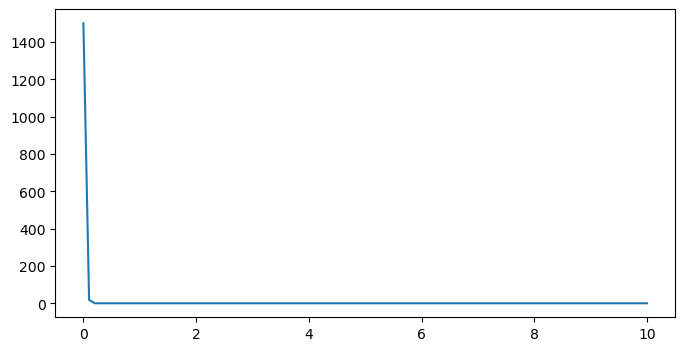

In [36]:
plt.figure(figsize=(8,4))
sns.lineplot(x=np.linspace(0.001,10,100), y=op)

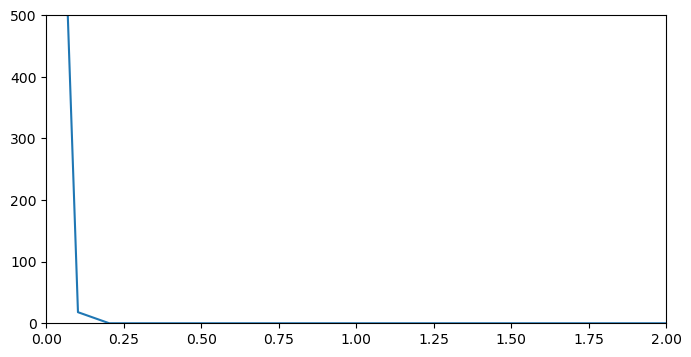

In [37]:
plt.figure(figsize=(8,4))
sns.lineplot(x=np.linspace(0.001,10,100), y=op)
plt.xlim(0,2)
plt.ylim(0,500)
plt.show()

In [38]:
# appr = 0.125

model = DBSCAN(eps= 0.125)
label = model.fit_predict(df)

In [44]:
pd.DataFrame(label.tolist()).value_counts()

 1    751
 0    746
-1      3
Name: count, dtype: int64

In [45]:
pd.DataFrame(label.tolist()).value_counts(normalize=True)*100

 1    50.066667
 0    49.733333
-1     0.200000
Name: proportion, dtype: float64

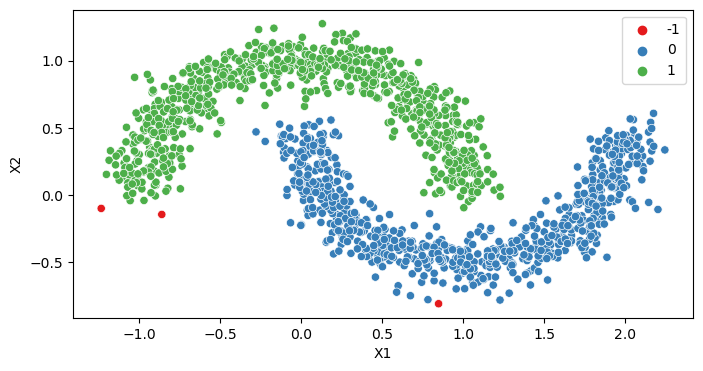

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='X1',y ='X2',hue=label,palette='Set1' )
plt.show()

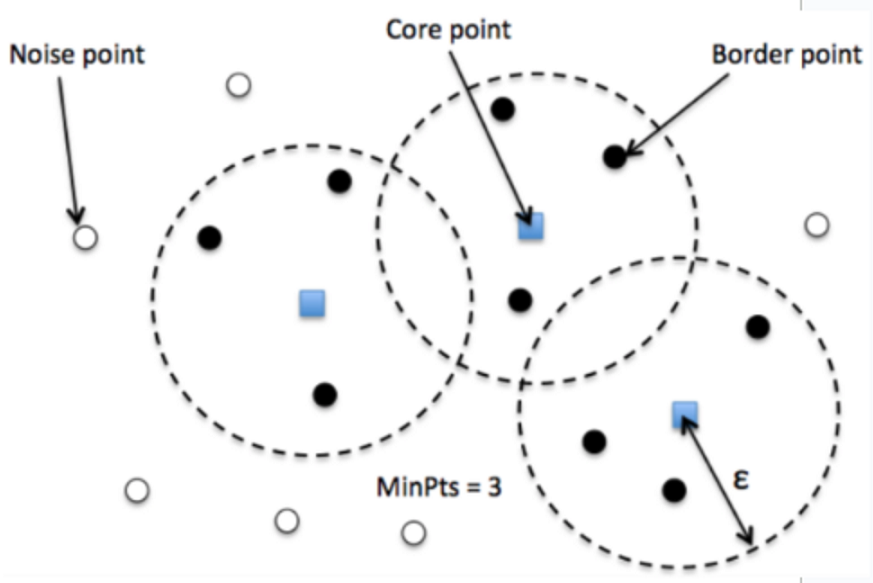

#
* eps = 0.125 (distance), minpts=3 (no.of datapoints)

* Core Point: A point is a core point if it has more than MinPts points within eps. 

* Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 

* Noise or outlier Point: A point which is not a core point or border point.


#
* data looks spherical in shape, nested shapes - > density based algo (DBSCAN)
* data linear -> distance based algo (Kmeans, hierarchical)